<a href="https://colab.research.google.com/github/SalasNorman/workshop/blob/main/red_wine_quality/red_wine_quality.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load dataset
url = "https://raw.githubusercontent.com/SalasNorman/workshop/refs/heads/main/red_wine_quality/red_wine_quality.csv"
df = pd.read_csv(url)

In [3]:
# Display the first few rows of the dataset to understand the structure
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
# Check the data types and look for any missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [5]:
# Check for missing values
df.isnull().sum()

,0
fixed acidity,0
volatile acidity,0
citric acid,0
residual sugar,0
chlorides,0
free sulfur dioxide,0
total sulfur dioxide,0
density,0
pH,0
sulphates,0


In [6]:
def check_duplicates(df):
    """
    Remove duplicate rows from the DataFrame.
    :param df: The DataFrame to clean
    :return: DataFrame with duplicates check
    """
    df_no_duplicates = df.duplicated().sum()
    return df_no_duplicates

In [7]:
check_duplicates(df)

np.int64(240)

In [8]:
# Drop dulicate
df.drop_duplicates(inplace=True)

# Check the remove duplicate rows
check_duplicates(df)

np.int64(0)

<ipython-input-9-6885eb56b1f4>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='quality', data=df, palette='viridis')


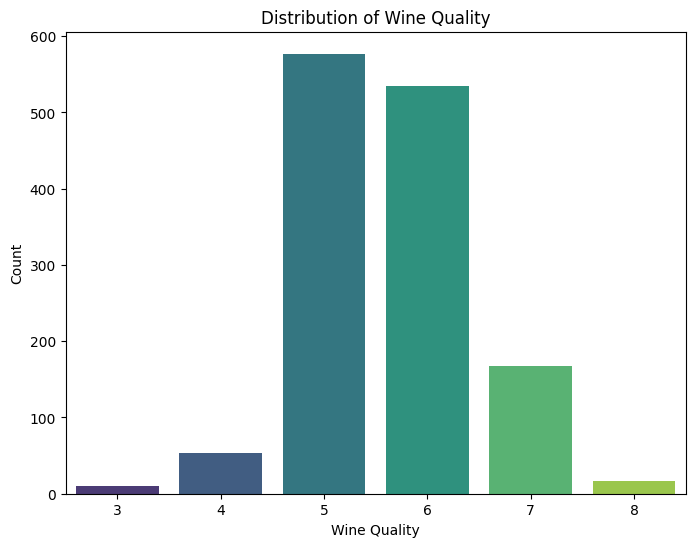

In [9]:
# Checking the distribution of the 'quality' column
plt.figure(figsize=(8, 6))
sns.countplot(x='quality', data=df, palette='viridis')
plt.title('Distribution of Wine Quality')
plt.xlabel('Wine Quality')
plt.ylabel('Count')
plt.show()

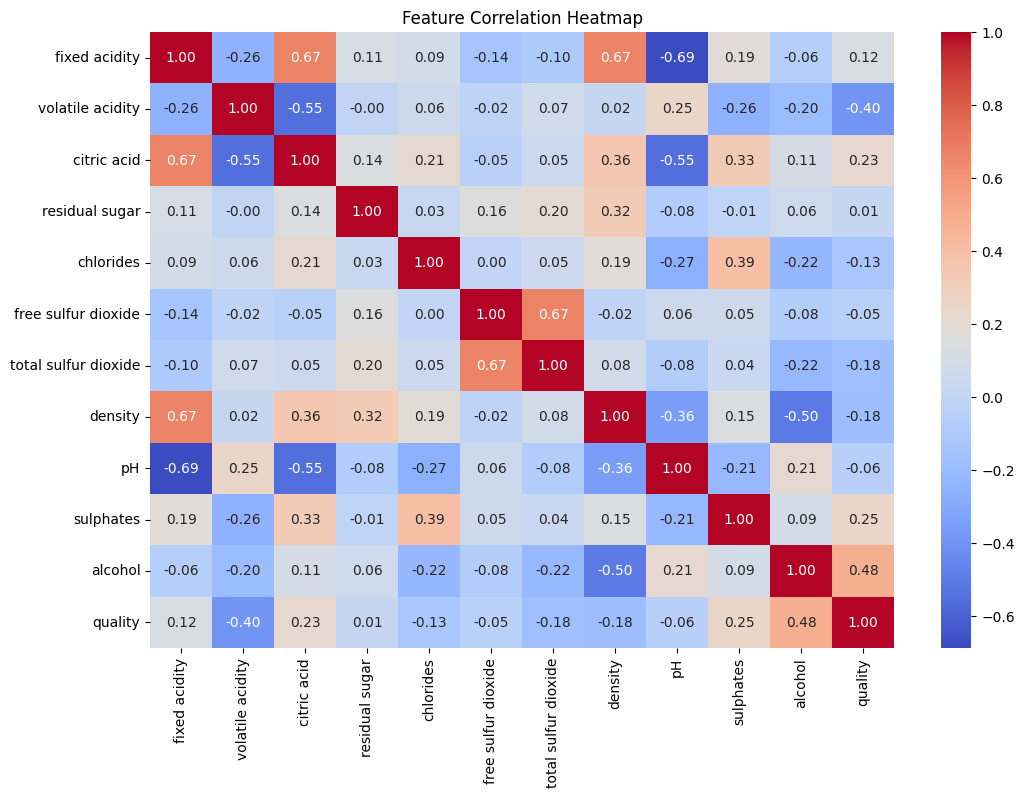

In [10]:
# Plotting the correlation heatmap between features
plt.figure(figsize=(12, 8))
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Feature Correlation Heatmap')
plt.show()

In [11]:
# Splitting the data into features (X) and target (y)
X = df.drop('quality', axis=1)  # Drop the target column
y = df['quality']  # The target variable (quality)

In [12]:
# Encoding 'quality' into categories (Low, Medium, High, Very High) for classification
y = pd.cut(y, bins=[0, 4, 6, 8, 10], labels=['Low', 'Medium', 'High', 'Very High'])

In [13]:
# Scaling the features to standardize the data (important for most ML models)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)  # Apply scaling to features

In [14]:
# Splitting the data into training and test sets (80% training, 20% testing)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

print(f"\nTraining data shape: {X_train.shape}")
print(f"Testing data shape: {X_test.shape}")


Training data shape: (1087, 11)
Testing data shape: (272, 11)



Evaluating Logistic Regression...
Accuracy of LogisticRegression: 0.84


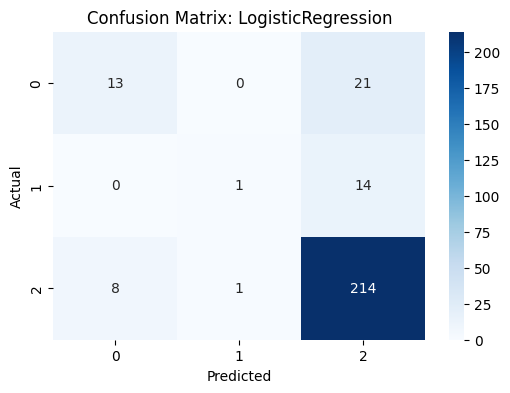


Classification Report for LogisticRegression:
              precision    recall  f1-score   support

        High       0.62      0.38      0.47        34
         Low       0.50      0.07      0.12        15
      Medium       0.86      0.96      0.91       223

    accuracy                           0.84       272
   macro avg       0.66      0.47      0.50       272
weighted avg       0.81      0.84      0.81       272


Evaluating Random Forest...
Accuracy of RandomForestClassifier: 0.85


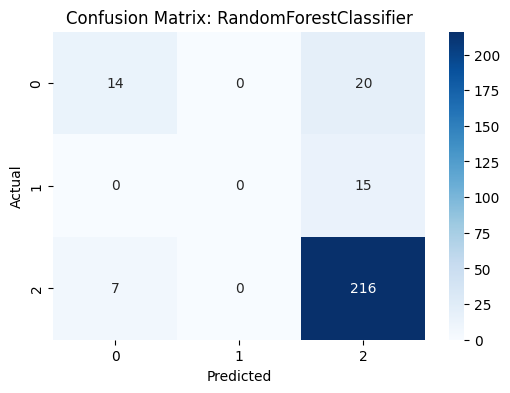


Classification Report for RandomForestClassifier:
              precision    recall  f1-score   support

        High       0.67      0.41      0.51        34
         Low       0.00      0.00      0.00        15
      Medium       0.86      0.97      0.91       223

    accuracy                           0.85       272
   macro avg       0.51      0.46      0.47       272
weighted avg       0.79      0.85      0.81       272


Evaluating SVM...


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Accuracy of SVC: 0.86


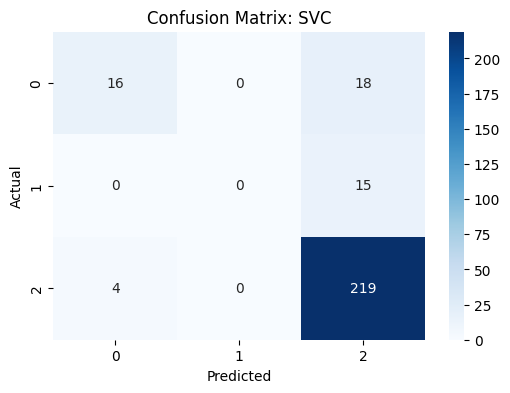


Classification Report for SVC:
              precision    recall  f1-score   support

        High       0.80      0.47      0.59        34
         Low       0.00      0.00      0.00        15
      Medium       0.87      0.98      0.92       223

    accuracy                           0.86       272
   macro avg       0.56      0.48      0.50       272
weighted avg       0.81      0.86      0.83       272



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [15]:
# Importing models and evaluation metrics
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Initializing models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(random_state=42),
    "SVM": SVC()
}

# Function to train and evaluate models
def evaluate_model(model, X_train, X_test, y_train, y_test):
    # Train the model
    model.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = model.predict(X_test)

    # Evaluate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy of {model.__class__.__name__}: {accuracy:.2f}")

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f"Confusion Matrix: {model.__class__.__name__}")
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

    # Classification Report
    print(f"\nClassification Report for {model.__class__.__name__}:")
    print(classification_report(y_test, y_pred))

# Evaluating all models
for name, model in models.items():
    print(f"\nEvaluating {name}...")
    evaluate_model(model, X_train, X_test, y_train, y_test)


Best Parameters: {'max_depth': 20, 'min_samples_split': 2, 'n_estimators': 100}
Best Score: 0.82
Accuracy of RandomForestClassifier: 0.84


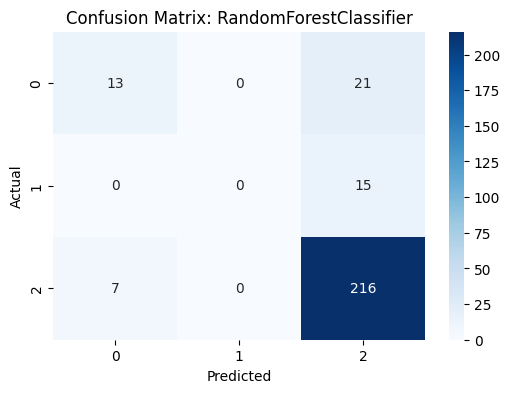


Classification Report for RandomForestClassifier:
              precision    recall  f1-score   support

        High       0.65      0.38      0.48        34
         Low       0.00      0.00      0.00        15
      Medium       0.86      0.97      0.91       223

    accuracy                           0.84       272
   macro avg       0.50      0.45      0.46       272
weighted avg       0.78      0.84      0.81       272



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [16]:
from sklearn.model_selection import GridSearchCV

# Hyperparameter grid for Random Forest
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20],
    'min_samples_split': [2, 5]
}

# Setting up GridSearchCV
grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=3, scoring='accuracy')

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Print the best parameters and score
print(f"\nBest Parameters: {grid_search.best_params_}")
print(f"Best Score: {grid_search.best_score_:.2f}")

# Evaluate the best model
best_rf_model = grid_search.best_estimator_
evaluate_model(best_rf_model, X_train, X_test, y_train, y_test)